Solución: [-0.5 -0.5]


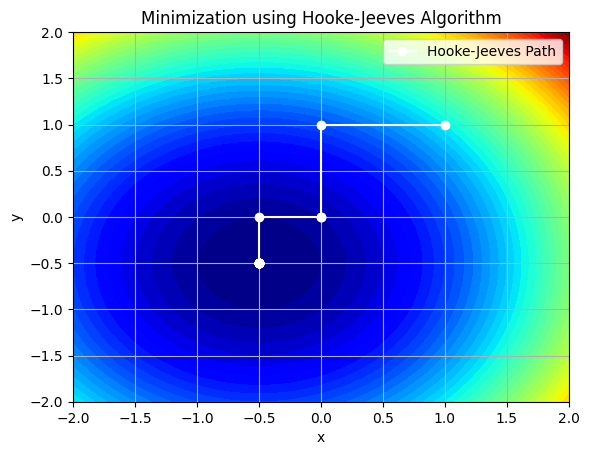

array([[ 1. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [-0.5,  0. ],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5],
       [-0.5, -0.5]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo que acepta arrays
def objective(x):
    return np.sum(x**2 + x -8, axis=0)

# Función para generar la base canónica (vectores unitarios)
def basis(i, n):
    e = np.zeros(n)
    e[i] = 1.0
    return e

# Algoritmo Hooke-Jeeves con almacenamiento del historial de soluciones
def hooke_jeeves(f, x, alpha, epsilon, gamma=0.5):
    # Para almacenar el progreso de las iteraciones
    iter_values = [x.copy()]
    
    # Evaluar función objetivo en el punto inicial
    y = f(x)
    n = len(x)

    # Ciclo principal hasta que alpha sea menor que epsilon
    while alpha > epsilon:
        improved = False
        x_best, y_best = x, y
        
        # Exploración alrededor del punto actual
        for i in range(n):
            for sgn in (-1, 1):
                x_prime = x + sgn * alpha * basis(i, n)
                y_prime = f(x_prime)

                # Si se encuentra una mejor solución, actualizar
                if y_prime < y_best:
                    x_best, y_best, improved = x_prime, y_prime, True

        # Actualizar el punto de referencia si hubo mejoras
        x, y = x_best, y_best
        iter_values.append(x.copy())

        # Si no hubo mejoras, reducir el tamaño de paso
        if not improved:
            alpha *= gamma

    # Devolver la mejor solución y el progreso
    return x, iter_values

# Parámetros de entrada
x0 = np.array([1.0, 1.0])  # Punto inicial
alpha = 1.0                # Tamaño inicial de los pasos
epsilon = 1e-5             # Criterio de parada

# Ejecutar el algoritmo Hooke-Jeeves
solution, iter_values = hooke_jeeves(objective, x0, alpha, epsilon)

# Mostrar la solución encontrada
print("Solución:", solution)

# Crear la gráfica del proceso de minimización
x_range = np.linspace(-2, 2, 400)  # Rango de valores de x
y_range = np.linspace(-2, 2, 400)  # Rango de valores de y
X, Y = np.meshgrid(x_range, y_range)
Z = objective(np.array([X, Y]))  # Evaluación de la función objetivo

# Gráfico de contorno de la función objetivo
plt.contourf(X, Y, Z, levels=50, cmap='jet')

# Convertir las soluciones a un arreglo para la gráfica
iter_values = np.array(iter_values)
plt.plot()
# Añadir el camino de las iteraciones en la gráfica
plt.plot(iter_values[:, 0], iter_values[:, 1], 'o-', color='w', label="Hooke-Jeeves Path")

# Añadir etiquetas y mostrar la gráfica
plt.xlabel('x')
plt.ylabel('y')
plt.title("Minimization using Hooke-Jeeves Algorithm")
plt.legend()
plt.grid(True)
plt.show()
iter_values